In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from parser import parse

In [3]:
program = '''
(defn nsum [w]
    (+ (sample (norm 2 1)) (get (get [[w w] [w w] [w w]] 1) 1))
)
(defn proc [r t f] 
    (if r t f)
)
(let [v 10
      a (sample (bern 0.1))] 
        (proc a (* (- v a) (nsum 14)) (sample (norm (+ -20 a) 20)))
    )
'''

Function proc(r,t,f)
	If
		Var r
	Then
		Var t
	Else
		Var f
Function nsum(w)
	Call +
		sample
			Call norm
				Num 2.0
				Num 1.0
		Call get
			Call get
				Call vector
					Call vector
						Var w
						Var w
					Call vector
						Var w
						Var w
					Call vector
						Var w
						Var w
				Num 1.0
			Num 1.0
Function toplevel()
	Let v = 
		Num 10.0
	In
		Let a = 
			sample
				Call bern
					Num 0.1
		In
			Call proc
				Var a
				Call *
					Call -
						Var v
						Var a
					Call nsum
						Num 14.0
				sample
					Call norm
						Call +
							Num -20.0
							Var a
						Num 20.0



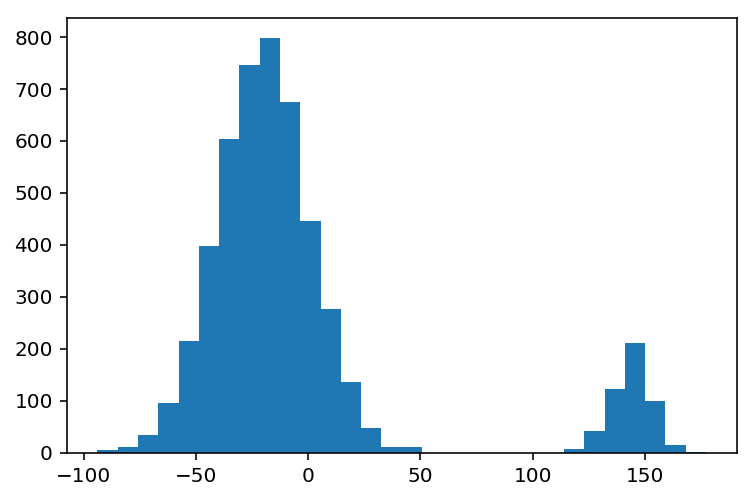

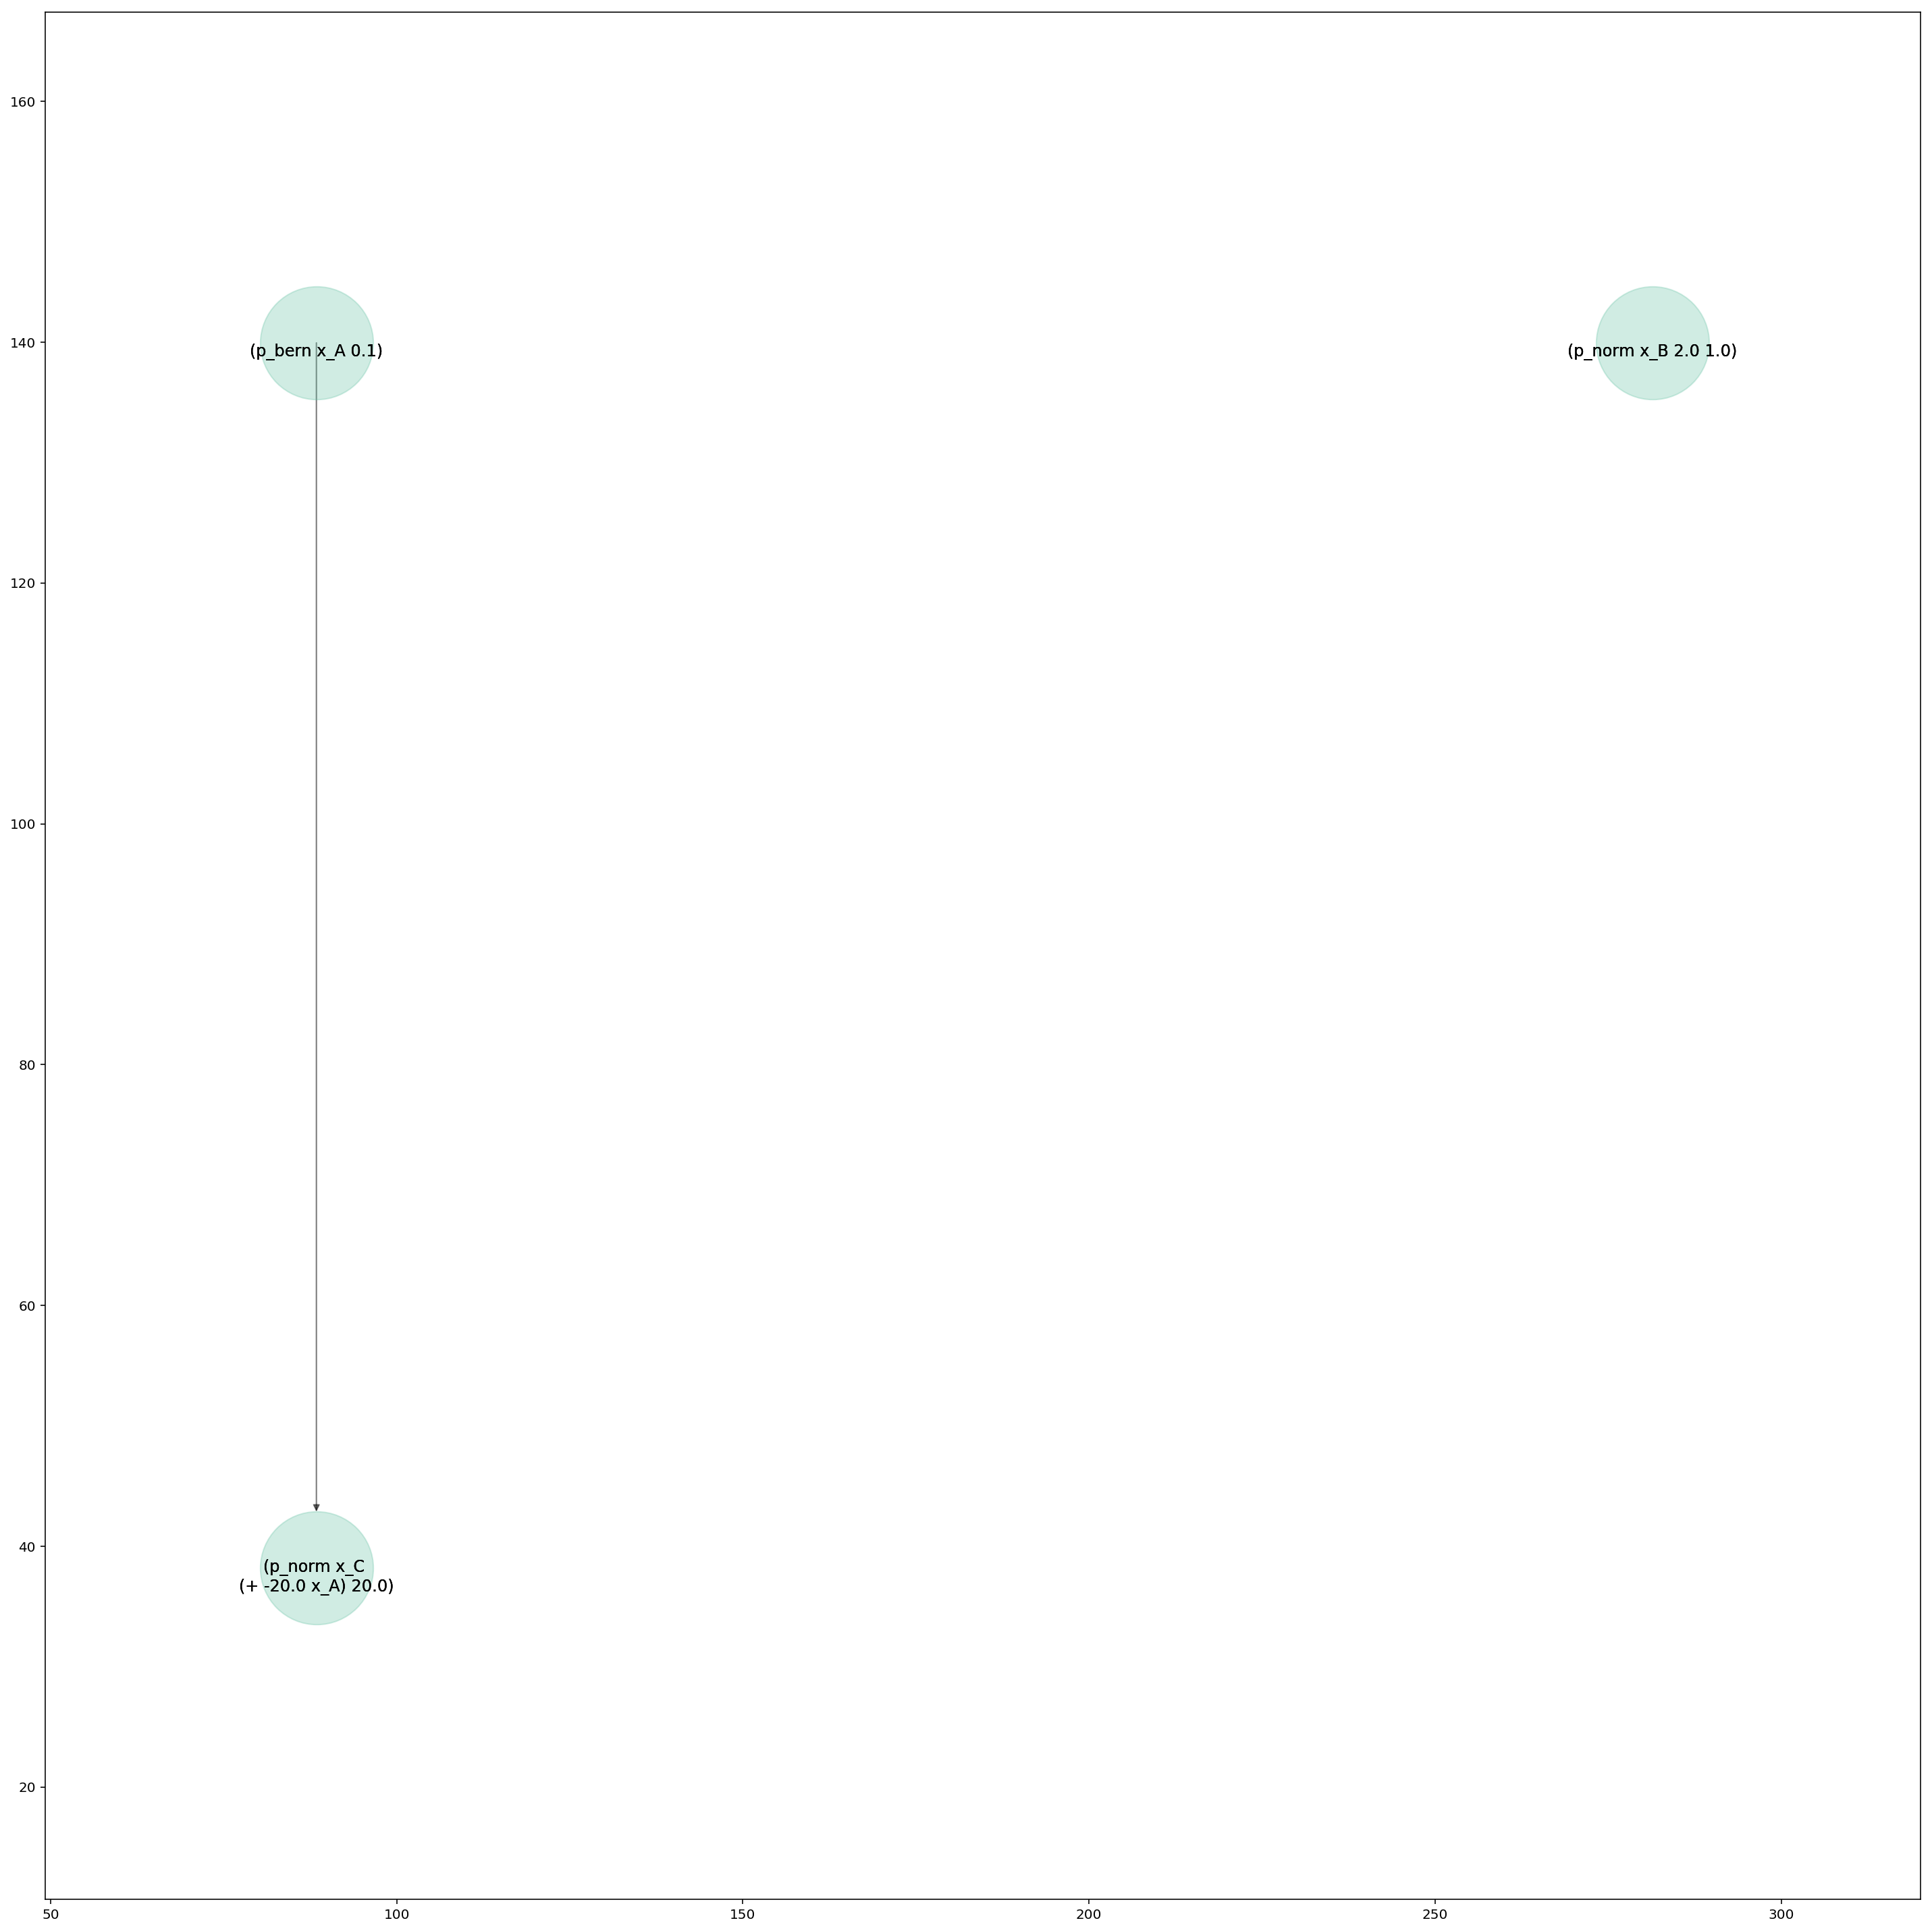

In [4]:
env = parse(program)
print(env)
nums = [env.run() for _ in range(5000)]
import matplotlib.pyplot as plt
_ = plt.hist(nums, bins=30)

g, e = env.compile()
g.draw()

In [5]:
program = '''
(let [ z (sample (bern 0.8))
       mu (if z (sample (norm 2.0 1.0)) (sample (norm 10.0 1.0)))
       d (norm mu 1.0)
       y 0.5]
    (observe d y)
    (observe d (+ y 4))
    (sample d)
)
'''
env = parse(program)
print(env)

Function toplevel()
	Let z = 
		sample
			Call bern
				Num 0.8
	In
		Let mu = 
			If
				Var z
			Then
				sample
					Call norm
						Num 2.0
						Num 1.0
			Else
				sample
					Call norm
						Num 10.0
						Num 1.0
		In
			Let d = 
				Call norm
					Var mu
					Num 1.0
			In
				Let y = 
					Num 0.5
				In
					Let _ = 
						observe
							Var d
							Var y
					In
						Let _ = 
							observe
								Var d
								Call +
									Var y
									Num 4.0
						In
							sample
								Var d



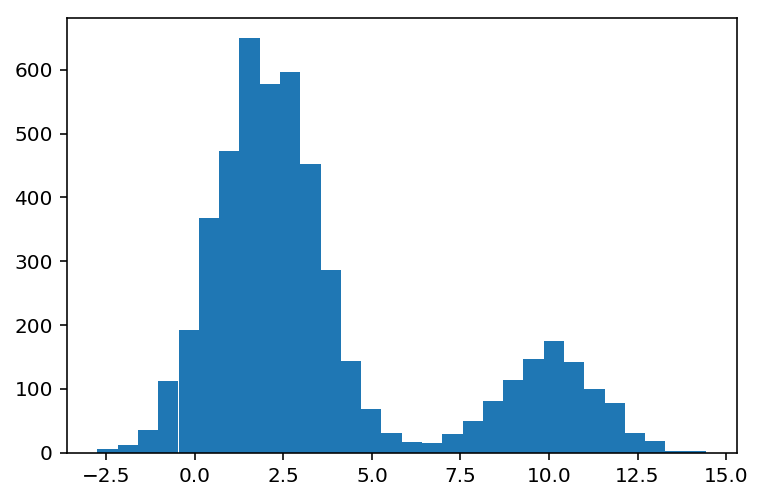

In [6]:
nums = [env.run() for _ in range(5000)]
import matplotlib.pyplot as plt
_ = plt.hist(nums, bins=30)

In [7]:
g, e = env.compile()

In [8]:
for k, v in g.Y.items() :
    print(str(k), str(v))

x_D 0.5
x_E (+ 0.5 4.0)


In [9]:
for k, v in g.P.items() :
    print(str(k), str(v))

x_A (p_bern x_A 0.8)
x_B (p_norm x_B 2.0 1.0)
x_C (p_norm x_C 10.0 1.0)
x_D (if True (p_norm x_D (if x_A x_B x_C) 1.0) 1)
x_E (if True (p_norm x_E (if x_A x_B x_C) 1.0) 1)
x_F (p_norm x_F (if x_A x_B x_C) 1.0)


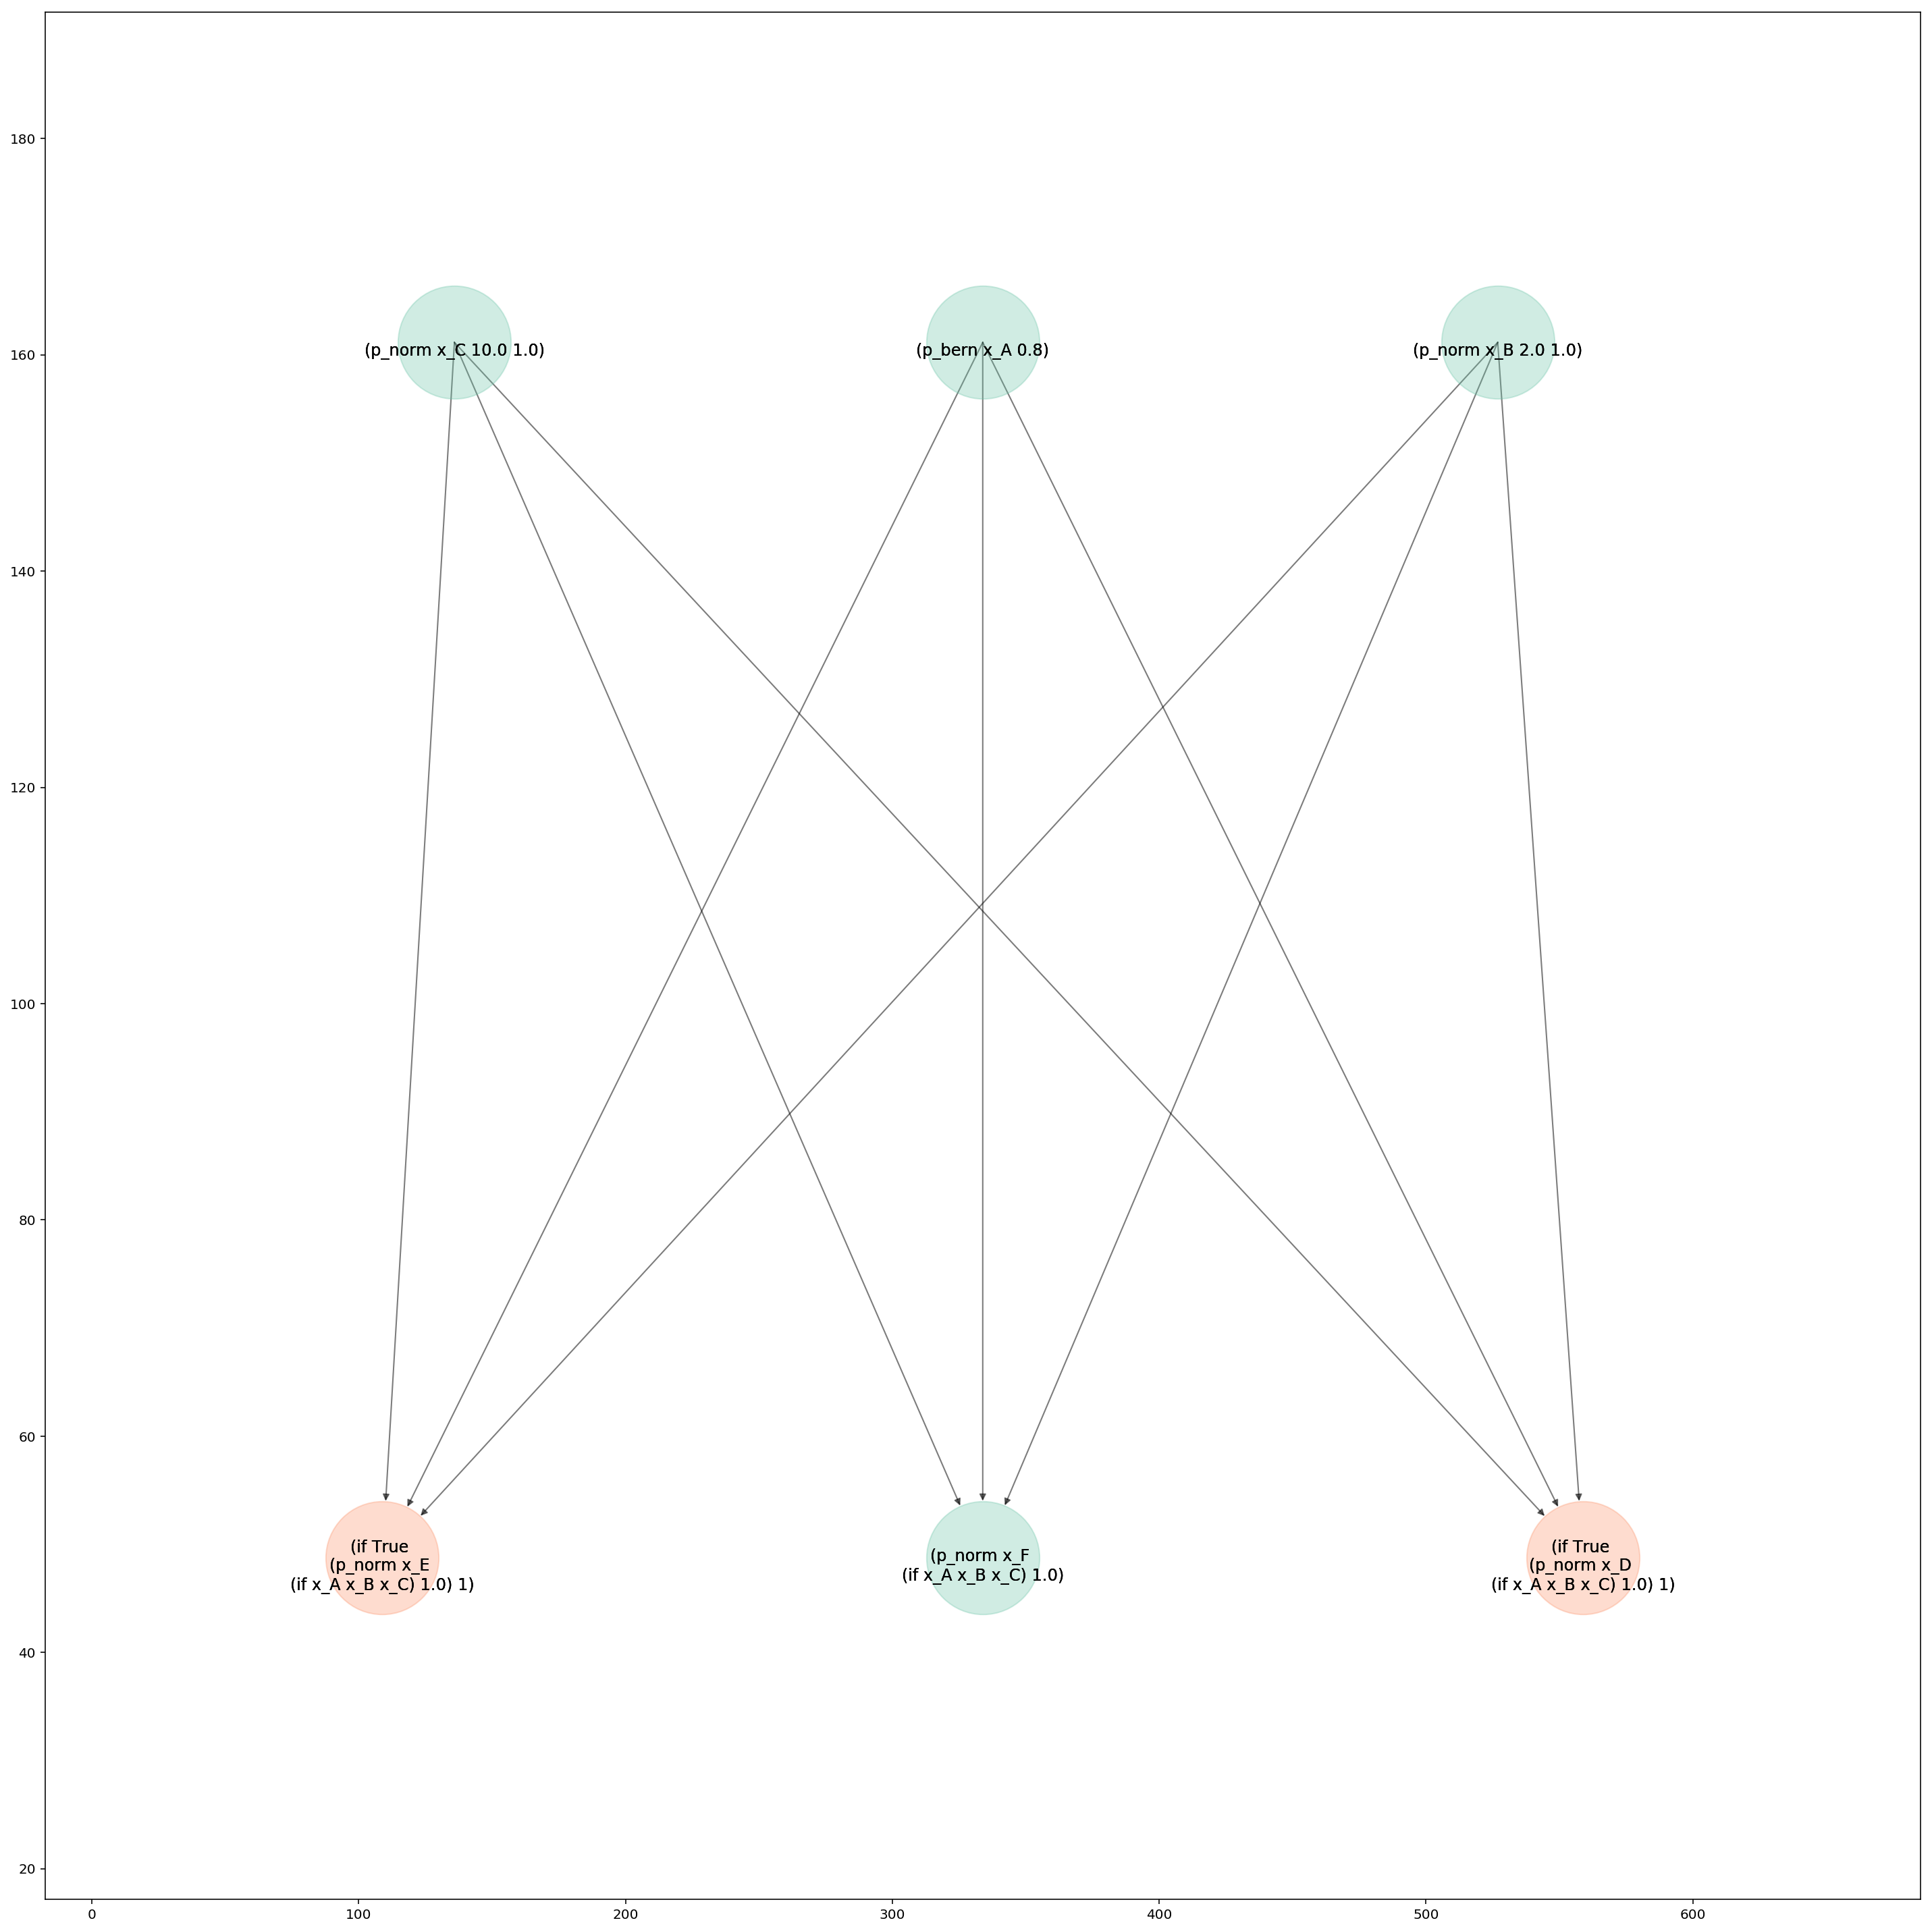

In [10]:
g.draw()

Function markov-step(n,xs,A)
	Let k = 
		Call last
			Var xs
	In
		Let Ak = 
			Call get
				Var A
				Var k
		In
			Call append
				Var xs
				Call vector
					sample
						Call discrete
							Var Ak
Function toplevel()
	Let A = 
		Call vector
			Call vector
				Num 0.9
				Num 0.1
			Call vector
				Num 0.1
				Num 0.9
	In
		Let x1 = 
			sample
				Call discrete
					Call vector
						Num 0.5
						Num 0.5
		In
			Let foppl_x_315803080823219541512197701168045618375_0 = 
				Var A
			In
				Let foppl_x_314744291194118572663080804349594804342_0 = 
					Call markov-step
						Num 0
						Call vector
							Var x1
						Var foppl_x_315803080823219541512197701168045618375_0
				In
					Let foppl_x_314744291194118572663080804349594804342_1 = 
						Call markov-step
							Num 1
							Var foppl_x_314744291194118572663080804349594804342_0
							Var foppl_x_315803080823219541512197701168045618375_0
					In
						Let foppl_x_314744291194118572663080804349594804342_2 = 
							Call markov-st

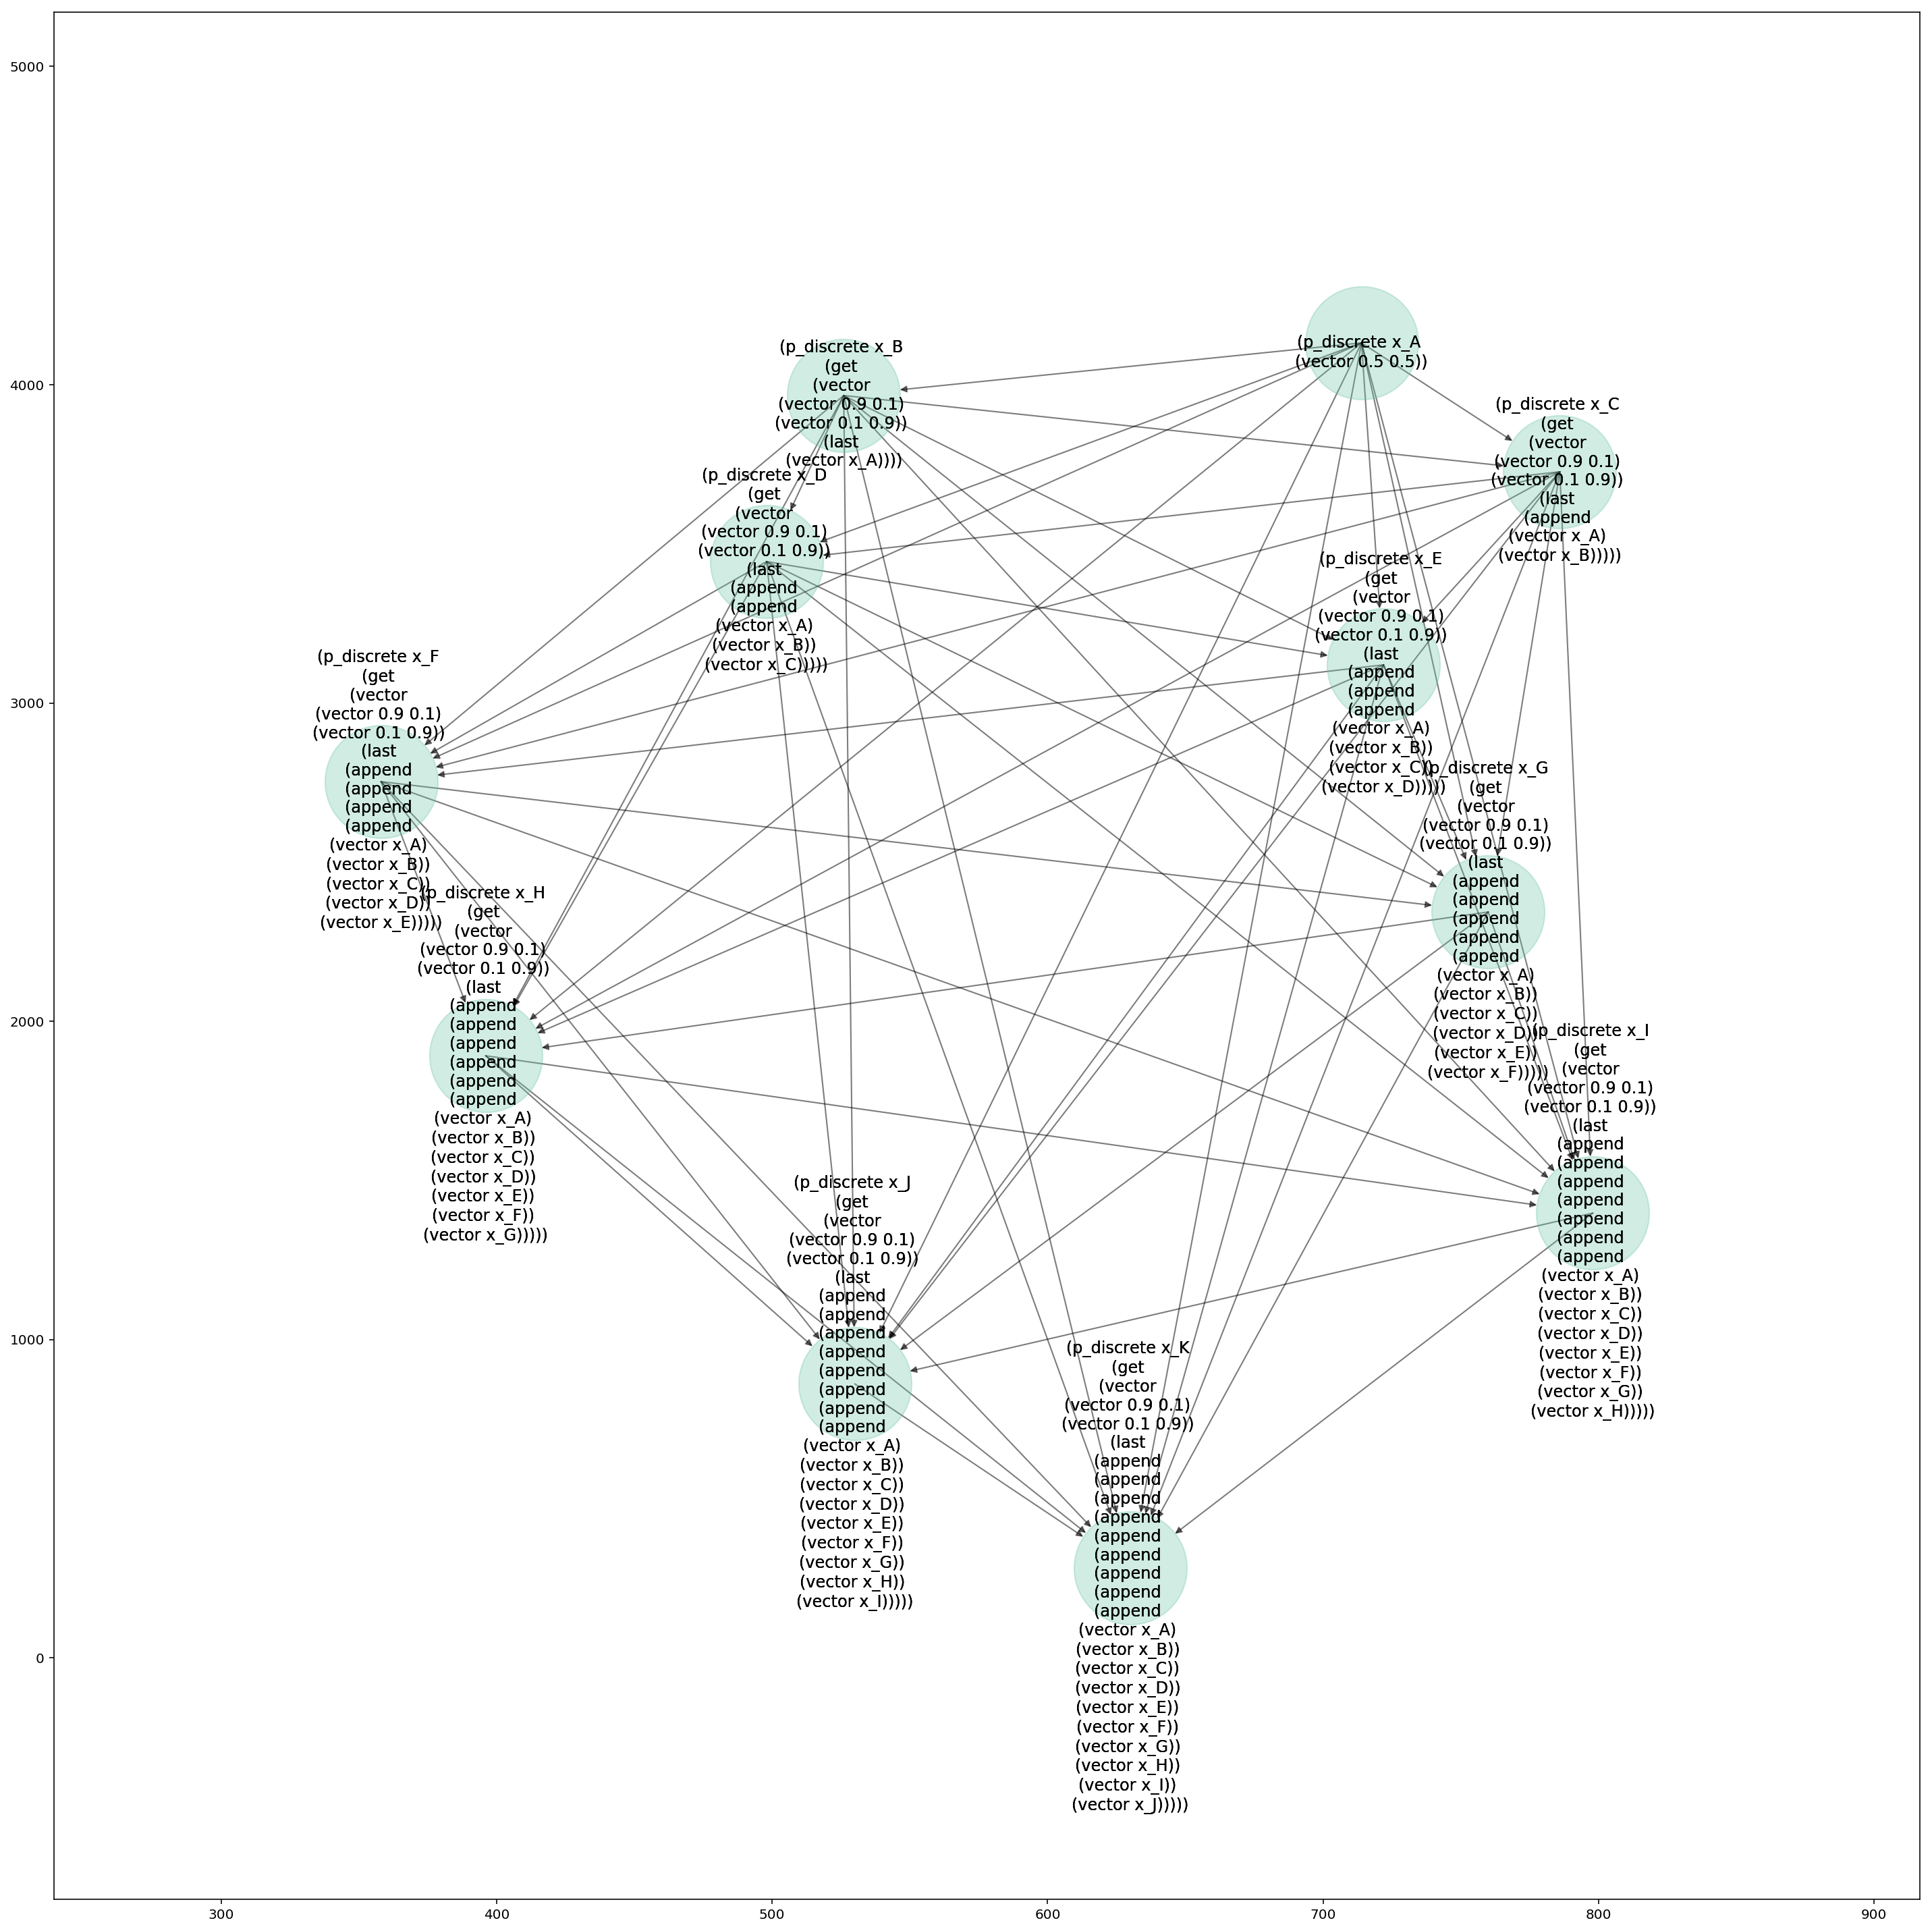

In [11]:
program = '''
(defn markov-step [n xs A]
    (let [k (last xs)
          Ak (get A k)]
        (append xs [(sample (discrete Ak))])
    )
)
(let [A [[0.9 0.1]
         [0.1 0.9]]
      x1 (sample (discrete [0.5 0.5]))]
    (loop 10 [x1] markov-step A)
)
'''
env = parse(program)
print(env)

# nums = [env.run() for _ in range(5000)]
# import matplotlib.pyplot as plt
# _ = plt.hist(nums, bins=30)

g, e = env.compile()
g.draw()

In [12]:
nums = [env.run() for _ in range(50)]

In [13]:
import numpy as np
nums = np.array(nums)

In [14]:
nums

array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 1,